In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import keras
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import *
from tensorflow.keras.applications import *
from keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
#import tensorflow_datasets as tfds
#import tensorflow_hub as hub
#mport tensorflow_addons as tfa
from time import time
import glob, warnings
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from PIL import Image

In [2]:
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split


# Load the data and labels from the saved NumPy arrays
data_array = np.load('D:\WESAD_code\WESAD_DATA_LABELSARRAY_FINAL\Subject_array\data_array.npy')
labels_array = np.load('D:\WESAD_code\WESAD_DATA_LABELSARRAY_FINAL\Labels_array\label_array.npy')

In [3]:
print(data_array.shape)
print(labels_array.shape)

(16492, 224, 224, 3)
(16492, 3)


In [4]:
####SEED_0

import numpy as np
from sklearn.model_selection import train_test_split

# Assuming the dataset is stored in the variable `data_array` and the corresponding labels in `labels_array`

# Splitting the dataset into 75% training, 5% validation, and 20% testing
X_train_val, X_test, y_train_val, y_test = train_test_split(data_array, labels_array, test_size=0.2, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0625, random_state=3)

# Checking the shape of each set
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Validation data shape:", X_val.shape)
print("Validation labels shape:", y_val.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (12368, 224, 224, 3)
Training labels shape: (12368, 3)
Validation data shape: (825, 224, 224, 3)
Validation labels shape: (825, 3)
Testing data shape: (3299, 224, 224, 3)
Testing labels shape: (3299, 3)


In [5]:
y_test

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

IMG_SIZE = 224
n_CLASS = 3

pretrained_model = tf.keras.applications.ResNet50(
            input_shape = (IMG_SIZE, IMG_SIZE, 3),
            include_top = False,
            weights='imagenet'
        )
pretrained_model.trainable = False

def create_model():
    x = pretrained_model.output
    x = GlobalAveragePooling2D()(x)
    # Add a fully connected layer
    x = Dense(128, activation='relu')(x)
    # Add a final softmax layer
    predictions = Dense(n_CLASS, activation='softmax')(x)

    # Create the final model
    model = Model(inputs=pretrained_model.input, outputs=predictions)

    return model

leaf_model = create_model()

In [7]:
leaf_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [8]:
learning_rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate = learning_rate)

leaf_model.compile(optimizer = optimizer,
              loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.0001),
              metrics = 'accuracy')


reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 1,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-7,
                                                 mode = 'max')

earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 5,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath ='./Resnet50_model1_FALSE3.hdf5',
                                                  monitor = 'val_accuracy',
                                                  verbose = 1,
                                                  save_best_only = True,
                                                  save_weights_only = True,
                                                  mode = 'max')


In [9]:
import time
import tensorflow as tf

class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        epoch_time_end = time.time()
        elapsed_time = epoch_time_end - self.epoch_time_start
        self.times.append(elapsed_time)

In [10]:
int_epoch = 15
time_callback = TimeHistory()
callbacks = [earlystopping, reduce_lr, checkpointer, time_callback]

history = leaf_model.fit(
        x=X_train,
        y=y_train,
        validation_data=(X_val, y_val),
        epochs=int_epoch,
        callbacks=callbacks
    )

Epoch 1/15
387/387 [==============================] - ETA: 0s - loss: 0.7307 - accuracy: 0.6954
Epoch 1: val_accuracy improved from -inf to 0.76000, saving model to .\Resnet50_model1_FALSE3.hdf5
387/387 [==============================] - 548s 1s/step - loss: 0.7307 - accuracy: 0.6954 - val_loss: 0.5985 - val_accuracy: 0.7600 - lr: 0.0010
Epoch 2/15
387/387 [==============================] - ETA: 0s - loss: 0.6059 - accuracy: 0.7512
Epoch 2: val_accuracy improved from 0.76000 to 0.76606, saving model to .\Resnet50_model1_FALSE3.hdf5
387/387 [==============================] - 545s 1s/step - loss: 0.6059 - accuracy: 0.7512 - val_loss: 0.5618 - val_accuracy: 0.7661 - lr: 0.0010
Epoch 3/15
387/387 [==============================] - ETA: 0s - loss: 0.5509 - accuracy: 0.7767
Epoch 3: val_accuracy improved from 0.76606 to 0.80727, saving model to .\Resnet50_model1_FALSE3.hdf5
387/387 [==============================] - 541s 1s/step - loss: 0.5509 - accuracy: 0.7767 - val_loss: 0.4942 - val_accu

In [11]:
print("Not using Gradient Centralization:")
print(f"Loss: {history.history['loss'][-1]}")
print(f"accuracy: {history.history['accuracy'][-1]}")
print(f"Validation accuracy: {history.history['val_accuracy'][-1]}")
print(f"Training Time: {sum(time_callback.times)} seconds")

Not using Gradient Centralization:
Loss: 0.43366605043411255
accuracy: 0.8335220217704773
Validation accuracy: 0.8290908932685852
Training Time: 6833.509380102158 seconds


In [12]:
acc = history.history['accuracy']
print(max(acc))

0.8335220217704773


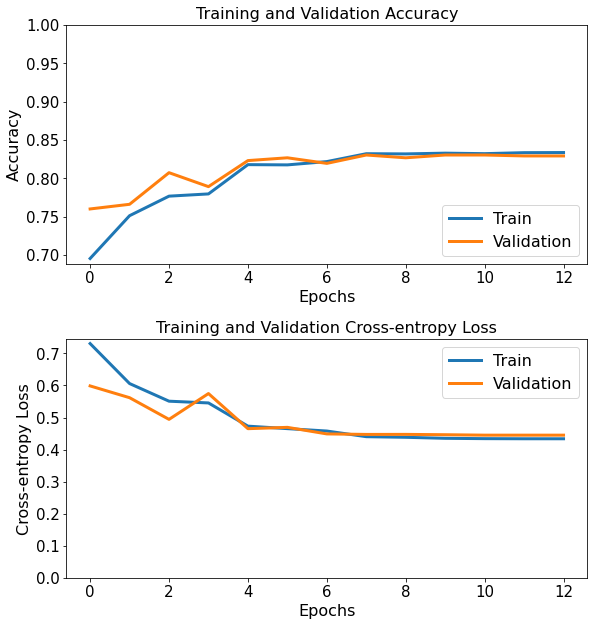

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.tight_layout(pad=3.0)
plt.plot(acc, label='Train' , linewidth = 3)
plt.plot(val_acc, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower right' , prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Accuracy' , fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy', fontsize=16)

plt.subplot(2, 1, 2)
plt.tight_layout(pad=3.0)
plt.plot(loss, label='Train', linewidth = 3)
plt.plot(val_loss, label='Validation', linewidth = 3)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', prop={'size': 16})
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Cross-entropy Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Cross-entropy Loss', fontsize=16)
plt.show()

In [8]:
def load_trained_model(weights_path):
   model = create_model()
   model.load_weights(weights_path)
   return model

In [9]:
new_model = load_trained_model('D:\WESAD_code\Resnet50_model1_FALSE3.hdf5')
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16448     ['conv2_block2_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv2_block3_1_bn (BatchNo  (None, 56, 56, 64)           256       ['conv2_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv2_block3_1_relu (Activ  (None, 56, 56, 64)           0         ['conv2_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv2_blo

 ation)                                                                                           
                                                                                                  
 conv3_block2_3_conv (Conv2  (None, 28, 28, 512)          66048     ['conv3_block2_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block2_3_bn (BatchNo  (None, 28, 28, 512)          2048      ['conv3_block2_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_add (Add)      (None, 28, 28, 512)          0         ['conv3_block1_out[0][0]',    
                                                                     'conv3_block2_3_bn[0][0]']   
          

 conv4_block1_2_conv (Conv2  (None, 14, 14, 256)          590080    ['conv4_block1_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_block1_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block1_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block1_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block1_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block1_0_conv (Conv2  (None, 14, 14, 1024)         525312    ['conv3_block4_out[0][0]']    
 D)       

                                                                                                  
 conv4_block3_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block3_add[0][0]']    
 on)                                                                                              
                                                                                                  
 conv4_block4_1_conv (Conv2  (None, 14, 14, 256)          262400    ['conv4_block3_out[0][0]']    
 D)                                                                                               
                                                                                                  
 conv4_block4_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block4_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_blo

 D)                                                                                               
                                                                                                  
 conv4_block6_3_bn (BatchNo  (None, 14, 14, 1024)         4096      ['conv4_block6_3_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block6_add (Add)      (None, 14, 14, 1024)         0         ['conv4_block5_out[0][0]',    
                                                                     'conv4_block6_3_bn[0][0]']   
                                                                                                  
 conv4_block6_out (Activati  (None, 14, 14, 1024)         0         ['conv4_block6_add[0][0]']    
 on)                                                                                              
          

 conv5_block3_1_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv5_block3_2_conv (Conv2  (None, 7, 7, 512)            2359808   ['conv5_block3_1_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv5_block3_2_bn (BatchNo  (None, 7, 7, 512)            2048      ['conv5_block3_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv5_block3_2_relu (Activ  (None, 7, 7, 512)            0         ['conv5_block3_2_bn[0][0]']   
 ation)   

In [10]:
from sklearn.metrics import classification_report

y_pred = new_model.predict(X_val)
y_predargmax = np.argmax(y_pred, axis=1)
y_true = y_val

y_pred_categorical = np.zeros_like(y_true)
y_pred_categorical[np.arange(len(y_predargmax)), y_predargmax] = 1


clreport = classification_report(y_true, y_pred_categorical, digits=4)
print(clreport)

26/26 [==============================] - 34s 1s/step
              precision    recall  f1-score   support

           0     0.8111    0.9210    0.8626       443
           1     0.8960    0.9032    0.8996       248
           2     0.7361    0.3955    0.5146       134

   micro avg     0.8303    0.8303    0.8303       825
   macro avg     0.8144    0.7399    0.7589       825
weighted avg     0.8245    0.8303    0.8172       825
 samples avg     0.8303    0.8303    0.8303       825



**Testing**

In [11]:
from sklearn.metrics import accuracy_score, classification_report

y_predt = new_model.predict(X_test)
y_predargmaxt = np.argmax(y_predt, axis=1)
y_truet = y_test

# Assuming y_predargmax and y_test are already defined
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded labels to integer labels
test_accuracy = accuracy_score(y_test_labels, y_predargmaxt)
print("Test Accuracy:", test_accuracy)

y_pred_categoricalt = np.zeros_like(y_truet)
y_pred_categoricalt[np.arange(len(y_predargmaxt)), y_predargmaxt] = 1


clreportt = classification_report(y_truet, y_pred_categoricalt, digits=4)
print(clreportt)

104/104 [==============================] - 123s 1s/step
Test Accuracy: 0.8202485601697485
              precision    recall  f1-score   support

           0     0.7897    0.9268    0.8527      1734
           1     0.8980    0.8773    0.8875       994
           2     0.7747    0.3975    0.5255       571

   micro avg     0.8202    0.8202    0.8202      3299
   macro avg     0.8208    0.7339    0.7552      3299
weighted avg     0.8197    0.8202    0.8066      3299
 samples avg     0.8202    0.8202    0.8202      3299



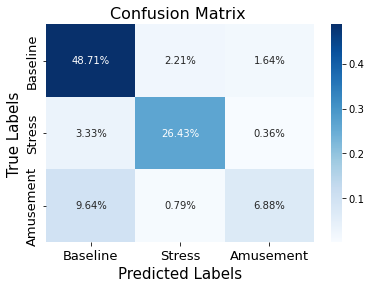

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

classes = ['Baseline', 'Stress', 'Amusement']

# Assuming y_predargmaxt and y_truet are already defined
cm = confusion_matrix(y_test_labels, y_predargmaxt)

plt.figure(figsize=(6,4))
ax=sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

plt.title('Confusion Matrix ', fontsize=16)
plt.ylabel('True Labels', fontsize=15)
plt.xlabel('Predicted Labels', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
ax.xaxis.set_ticklabels(classes, fontsize=13)
ax.yaxis.set_ticklabels(classes, fontsize=13)
plt.show()

In [18]:
import os
os.chdir(r'D:\WESAD_code')
r'Resnet50_model1_FALSE3.hdf5'

'Resnet50_model1_FALSE3.hdf5'

In [19]:
from IPython.display import FileLink
FileLink(r'Resnet50_model1_FALSE3.hdf5')

D:\WESAD_code\Resnet50_model1_FALSE3.hdf5